In [67]:
import torch
from torch.utils.data import Dataset
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [68]:
batch_size = 16
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean = [0.4914, 0.4822, 0.4465], std = [0.2470, 0.2435, 0.2616])])
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                         shuffle=False, num_workers=0)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

Files already downloaded and verified
Files already downloaded and verified


device(type='cuda')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


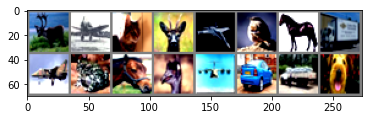

deer  plane cat   deer  plane bird  horse truck plane frog  horse bird  plane car   truck dog  


In [69]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [70]:

class network_g_19(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding = 1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding = 1)
        self.conv7 = nn.Conv2d(256, 512, 3, padding = 1)
        self.conv8 = nn.Conv2d(512, 512, 3, padding = 1)
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)
        self.flatten = nn.Flatten()
        self.dropout1 = nn.Dropout(0.6)
        self.dropout2 = nn.Dropout(0.6)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn1(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = self.bn2(x)
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = self.pool(x)
        x = self.bn3(x)
        x = F.relu(self.conv7(x))
        x = F.relu(self.conv8(x))
        x = self.pool(x)
        x = self.bn4(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

net = network_g_19()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net.to(device)
criterion.to(device)
net

network_g_19(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [71]:
training_loss_history = []
testing_accuracy_history = []
testing_loss_history = []
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            training_loss_history.append(running_loss / 2000)
            running_loss = 0.0
    if True: #get test accuracy on every epoch
        correct = 0
        total = 0
        total_test_loss = 0.0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                # calculate outputs by running images through the network
                outputs = net(images.cuda())
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                test_loss = criterion(outputs, labels.cuda())
                testing_loss_history.append(test_loss.item()) 
                total += labels.cuda().size(0)
                correct += (predicted == labels.cuda()).sum().item()
        accuracy = 100 * correct / total
        testing_accuracy_history.append(accuracy)
        print(f'Accuracy of the network on the 10000 test images: {accuracy} %')
print('Finished Training')

[1,  2000] loss: 1.511
Accuracy of the network on the 10000 test images: 64.61 %
[2,  2000] loss: 0.870
Accuracy of the network on the 10000 test images: 73.0 %
[3,  2000] loss: 0.651
Accuracy of the network on the 10000 test images: 77.63 %
[4,  2000] loss: 0.511
Accuracy of the network on the 10000 test images: 79.52 %
[5,  2000] loss: 0.400
Accuracy of the network on the 10000 test images: 80.13 %
[6,  2000] loss: 0.322
Accuracy of the network on the 10000 test images: 80.99 %
[7,  2000] loss: 0.251
Accuracy of the network on the 10000 test images: 80.84 %
[8,  2000] loss: 0.199
Accuracy of the network on the 10000 test images: 81.2 %
[9,  2000] loss: 0.156
Accuracy of the network on the 10000 test images: 81.73 %
[10,  2000] loss: 0.125
Accuracy of the network on the 10000 test images: 82.08 %
[11,  2000] loss: 0.106
Accuracy of the network on the 10000 test images: 82.72 %
[12,  2000] loss: 0.082
Accuracy of the network on the 10000 test images: 82.75 %
[13,  2000] loss: 0.072
Acc

In [72]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images.cuda())
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.cuda().size(0)
        correct += (predicted == labels.cuda()).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 83.33 %


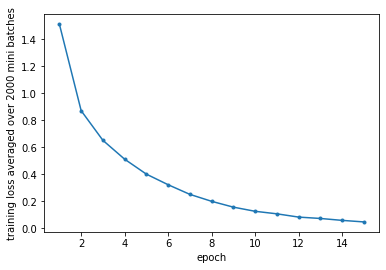

In [92]:
import seaborn as sns

plt.plot(range (1, 16), training_loss_history, marker = '.')
plt.xlabel("epoch")
plt.ylabel("training loss averaged over 2000 mini batches")
plt.savefig("training_loss.jpg")

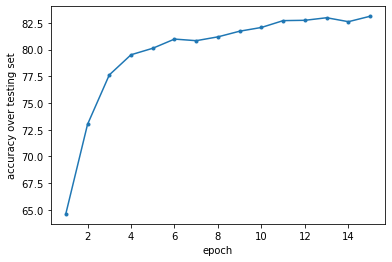

In [97]:
plt.plot(range(1, 16), testing_accuracy_history, marker = '.')
plt.xlabel("epoch")
plt.ylabel("accuracy over testing set")
plt.savefig("testing_accuracy.jpg")

In [98]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.cuda())
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label.cuda() == prediction:
                correct_pred[classes[label.cuda()]] += 1
            total_pred[classes[label.cuda()]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')




Accuracy for class: plane is 87.5 %
Accuracy for class: car   is 93.3 %
Accuracy for class: bird  is 73.4 %
Accuracy for class: cat   is 69.7 %
Accuracy for class: deer  is 79.5 %
Accuracy for class: dog   is 73.9 %
Accuracy for class: frog  is 88.6 %
Accuracy for class: horse is 87.7 %
Accuracy for class: ship  is 90.2 %
Accuracy for class: truck is 88.6 %


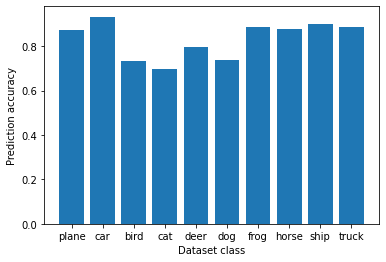

In [99]:
accuracy_by_class = {}
for classname in correct_pred.keys():
    accuracy_by_class[classname] = correct_pred[classname] / total_pred[classname]
plt.bar(accuracy_by_class.keys(), accuracy_by_class.values())
plt.xlabel("Dataset class")
plt.ylabel("Prediction accuracy")
plt.savefig("acc_by_class.jpg", transparent = False)

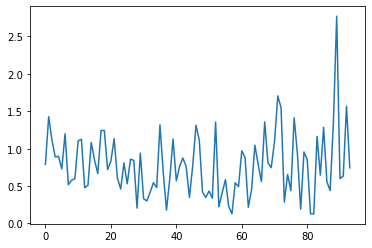

In [111]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
writer.add_graph()

TypeError: Couldn't build proto file into descriptor pool!
Invalid proto descriptor for file "tensorflow/python/framework/cpp_shape_inference.proto":
  tensorflow.CppShapeInferenceResult.HandleShapeAndType.specialized_type: ".tensorflow.SpecializedType" is not defined.
